In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Heart Prediction Quantum Dataset.csv")

In [3]:
df.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [4]:
df.columns

Index(['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate',
       'QuantumPatternFeature', 'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [6]:
df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


In [ ]:
sns.barplot(data=df, x='Product', y='Sales', palette='pastel')
plt.title('Sales by Product')
plt.show()

<ipython-input-20-be137c74cd62>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df['AgeBin'] = pd.cut(heart_df['Age'], bins=8)


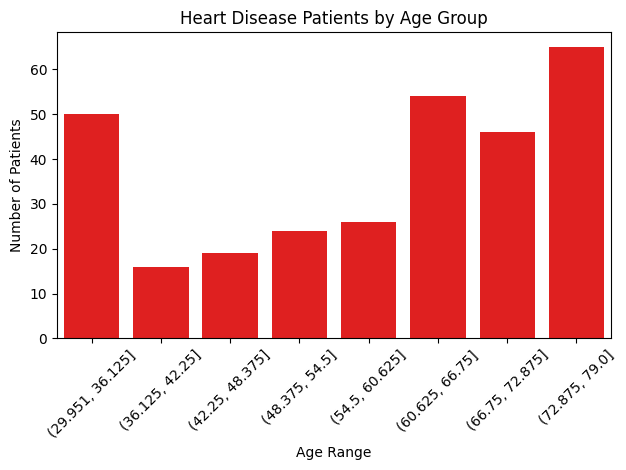

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only patients with HeartDisease
heart_df = df[df['HeartDisease'] == 1]

# Create 5 age bins
heart_df['AgeBin'] = pd.cut(heart_df['Age'], bins=8)

# Count how many patients fall into each bin
age_bin_counts = heart_df['AgeBin'].value_counts().sort_index()

# Plot bar chart
sns.barplot(x=age_bin_counts.index.astype(str), y=age_bin_counts.values, color='red')
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.title('Heart Disease Patients by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


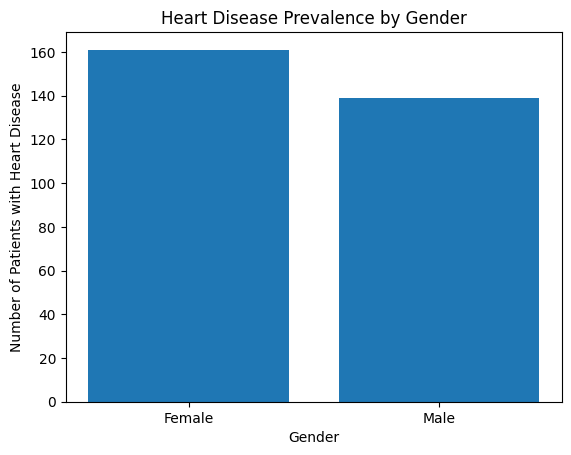

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Get Gender value counts for patients with HeartDisease
gender_counts = df[df['HeartDisease'] == 1]['Gender'].value_counts()

# Replace 1 with 'Male' and 0 with 'Female' in the index
gender_counts.index = gender_counts.index.map({1: 'Male', 0: 'Female'})

# Create the bar plot with custom labels
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Patients with Heart Disease')
plt.title('Heart Disease Prevalence by Gender')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
model = LogisticRegression()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['HeartDisease'],axis =1), df['HeartDisease'], test_size=0.2, random_state=42)

In [33]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.score(X_train, y_train)

0.9275

In [35]:
y_val = model.predict(X_test)

In [36]:
accuracy_score(y_test, y_val)

0.94